### K-mer Matrix Clustering

This script performs clustering on a k-mer feature matrix, which can be either the full matrix or the PCA-selected version generated using `feature_selection_from_PCA.py`. It begins by generating a **scree plot** (elbow method) to help determine the optimal number of clusters based on the within-cluster sum of squares (WCSS). 

After selecting a suitable number of clusters, the script applies the k-means clustering algorithm and assigns each sample a **cluster label**. The clustered data is then saved to the `data/` directory for downstream analysis.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [24]:
# select all features or PCA selected features for clustering

all_features = pd.read_csv('../data/k_mer_matrix.csv', index_col=0)
pca_features = pd.read_csv('../data/PCA_selected_kmer_matrix.csv', index_col=0)

In [25]:
all_features.head(2)

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TAAA,TACA,TAGA,TATA,TCAA,TCCA,TCGA,TGAA,TGCA,TTAA
id,,,,,,,,,,,,,,,,,,,,,
PQ614275,0.009205,0.012234,0.011584,0.007580,0.014116,0.012388,0.01208,0.012354,0.009257,0.013996,...,0.010951,0.009462,0.004466,0.002789,0.011002,0.008435,0.001848,0.011276,0.006451,0.006314
PQ678706,0.002421,0.005353,0.005539,0.003514,0.006121,0.007704,0.00654,0.006820,0.007192,0.009450,...,0.004841,0.009054,0.005237,0.002700,0.006982,0.008588,0.002304,0.006377,0.006517,0.003002


In [26]:
scaler = StandardScaler()

scaled_all_features = pd.DataFrame(scaler.fit_transform(all_features), columns=all_features.columns)

scaled_pca_features = pd.DataFrame(scaler.fit_transform(pca_features), columns=pca_features.columns)


In [27]:
#get optimized value for k using elbow plot

def get_optimal_k(data, max_k=10):  
    k_val = []
    inertias = []

    for k in range(1, max_k + 1):   
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        k_val.append(k)
        inertias.append(kmeans.inertia_)

    
    fig = plt.subplots(figsize=(8, 3))
    plt.plot(k_val, inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()



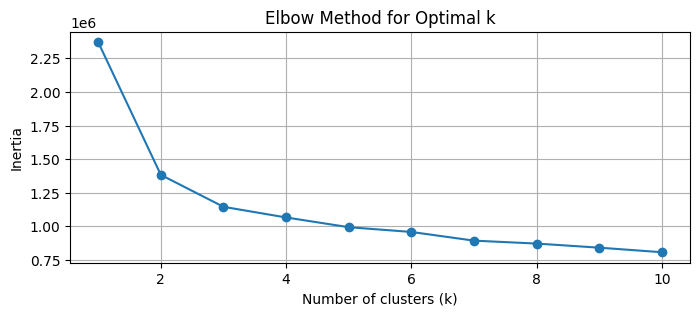

In [28]:
get_optimal_k(scaled_all_features, max_k=10) 

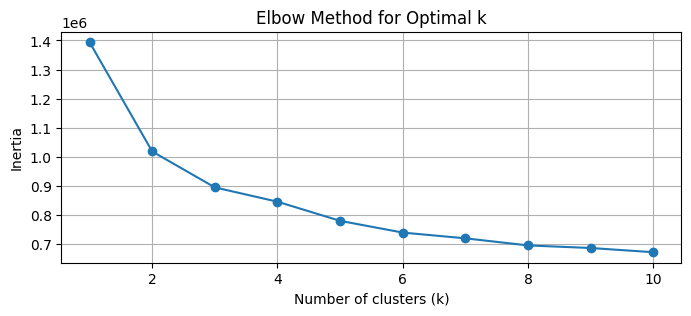

In [29]:
get_optimal_k(scaled_pca_features, max_k=10) #9

### Applying k-means clustering

In [40]:
kmean_all = KMeans(n_clusters=3)
kmean_pca = KMeans(n_clusters=4)

kmean_all.fit(scaled_all_features)
kmean_pca.fit(scaled_pca_features)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [42]:
scaled_all_features['#cluster_label'] = kmean_all.labels_
scaled_pca_features['#cluster_label'] = kmean_pca.labels_

In [43]:
scaled_all_features.head(5)

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TACA,TAGA,TATA,TCAA,TCCA,TCGA,TGAA,TGCA,TTAA,#cluster_label
0,-0.327114,0.751283,0.320578,-0.375994,1.115868,2.876494,1.934438,1.204988,-0.322929,2.048753,...,0.890743,-0.292892,-0.130581,0.062019,0.233653,-0.858767,0.187832,2.444571,0.348362,0
1,-0.911734,-0.670246,-0.715936,-0.839081,-0.865151,0.031392,-0.685251,-0.413675,-0.769203,0.294472,...,0.763492,-0.069160,-0.160354,-0.893155,0.309665,-0.710709,-1.006039,2.500106,-0.467531,0
2,-0.914882,-0.690709,-0.717222,-0.843932,-0.856336,0.047683,-0.691415,-0.397630,-0.747786,0.327886,...,0.726229,-0.091000,-0.211738,-0.891334,0.263051,-0.722356,-0.997713,2.489298,-0.460217,0
3,-0.801968,-0.474434,0.184251,-0.648181,0.179073,-0.091110,-1.334286,0.780413,1.370040,1.878077,...,1.339690,1.160438,0.020475,0.194474,-0.714391,-0.781766,0.196195,1.427130,0.334054,1
4,-0.805431,-0.600752,0.229967,-0.678259,0.162604,-0.166627,-1.284379,0.669652,1.380489,1.922411,...,1.236050,1.364234,0.150759,0.179123,-0.797558,-0.782957,0.173573,1.458569,0.234461,1


In [44]:
scaled_all_features.to_csv('../data/all_data_clustered.csv', index=False)
scaled_pca_features.to_csv('../data/pca_data_clustered.csv', index=False)

In [45]:
scaled_all_features.shape

(17424, 137)